# PM Homework 7

**FBA Quant 이의형**

---

## Assignment 1. Summarize Text Book

- [Quantitative Portfolio Management in Python] Chap 5. Markowitz Without a Risk-free Asset

## Chap 5. Markowitz Without a Risk-free Asset

**CML (Capital Market Line)**  

CML 상의 포트폴리오는 무위험자산과 위험자산의 배분으로 구성할 수 있으며, 이를 Tangent Portfolio라 한다.  

따라서 최적 배분 문제를 두 단계로 나눌 수 있다.  
- 투자자가 감당 가능한 위험 노출을 결정
- 해당 수준의 위험을 제공하는 Tangent Portfolio에 대한 배분 계산 (James Tobin: Separation Theorem)

**SML (Security Market Line)**  

포트폴리오의 베타는 Tangent Portfolio와 상관 관계가 있는 위험을 측정하며, SML은 자산의 기대수익률과 베타 사이의 선형 관계를 설정한다.  

CML과 SML에 대한 결과는 일반적으로 CAPM으로 알려져 있다.

### 5.1 The Optimization Problem

$\Pi$: 자산 비중 벡터

$\Pi = 
\begin{pmatrix}
    \pi^0: \text {risk-free weight} \\
    \pi: \text {risk weight}
\end{pmatrix}
$  

따라서 무위험 자산 수익률 $r_0$는
$\Pi_0 = 
\begin{pmatrix}
    1\\
    0
\end{pmatrix}
$ 
와 일치한다.  

$R(\Pi)$: 포트폴리오 수익률  

$m(\Pi)$: 포트폴리오 기대수익률  

$\sigma(\Pi)$: 포트폴리오 표준편차

$\Pi_P$에 대하여 $R_P, m_P, \sigma_P$로 표현

investment portfolio의 무위험자산 배분: $1 - \pi'1_d$  
self-financing portfolio의 무위험자산 배분: $- \pi'1_d$

**Remark 5.1.1**

- The return is $r_0 + \pi'(R - r_{0}1d)$,
- The expected return is $r_0 + \pi'(M - r_01d)$,
- The variance of the return is $\pi'\sum\pi$.

For a self-financing portfolio of risky allocation $\pi$:

- The return is $\pi'(R - r_{0}1d)$,
- The expected return is $\pi'(M - r_01d)$,
- The variance of the return is $\pi'\sum\pi$.

efficient portfolio는 분산을 최소화 시키고, 기대 수익률을 얻을 수 있도록 진행한다. 

## Assignment 2. Python Implement

**(a)**  

'Week7_python.ipynb' is a code that implements the following functions:  
- 1) Individual stock returns
- 2) Standard deviation
- 3) Variance-covariance matrix
- 4) Correlation matrix
- 5) Standard deviation and expected return for the minimum variance portfolio
- 6) Visualizing Results.  

Check these result values using the 30 stocks included in the Dow Jones Industrial.

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import yfinance as yf


# 데이터 추출
Dow30 = ['UNH', 'GS', 'MSFT', 'HD', 'MCD', 
         'CAT', 'AMGN', 'V', 'CRM', 'BA', 
         'HON', 'AAPL', 'CVX', 'TRV', 'WMT', 
         'JNJ', 'AXP', 'PG', 'JPM', 'IBM', 
         'MRK', 'MMM', 'NKE', 'DIS', 'KO', 
         'CSCO', 'DOW', 'INTC', 'VZ', 'WBA']

# TO DO : 종목 입력 및 기간 변경하여 최적의 포트폴리오 구하기
Ticker = Dow30
start = '2021-01-01'
end = '2021-12-31'

data = pd.DataFrame()
for x in Ticker:
    data[x] = yf.download(x, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [2]:
# 파라미터 생성
r = 0  # 무위험 이자율(without risk-free assets)
AFactor = len(data)  # 연환산 요소(총 관측 기간)
n_Ticker = len(Ticker)  # 포트폴리오 주식 수
Vec1 = np.linspace(1, 1, n_Ticker)  # 모든 구성 요소가 1로 동일한 벡터 생성

# 개별 종목 수익률 구하기
data_R = data.pct_change()[1:] # 일일 수익률
Mdata_R = data_R.mean() # 일일 수익률 평균
Mean = AFactor * Mdata_R  # 연환산 기준 수익률 평균

# 개별 종목 분산 구하기
Var = AFactor * data_R.var() # 연환산 기준 분산
STD = Var**0.5 # 연환산 기준 분산 표준편차

Sigma = AFactor * data_R.cov()  # 연환산 분산-공분산 행렬
InvSigma = inv(Sigma) # 분산-공분산행렬의 역행렬

# 기타 변수 계산
a = Vec1.T.dot(InvSigma).dot(Vec1)
b = Mean.T.dot(InvSigma).dot(Vec1)
sd_a = 1 / np.sqrt(a)  # 최소 분산 포트폴리오의 표준 편차
m_a = b / a  # 최소 분산 포트폴리오의 예상 수익률
m_w = np.sqrt((Mean - b/a * Vec1).T.dot(InvSigma).dot(Mean - b/a * Vec1))  # 포트폴리오 W의 예상 수익률
m_r = np.sqrt((Mean - r * Vec1).T.dot(InvSigma).dot(Mean - r * Vec1))  # 접점 포트폴리오의 예상 수익률

연환산 수익률 표준 편차:
UNH     0.191667
GS      0.252399
MSFT    0.210638
HD      0.200896
MCD     0.153335
CAT     0.255883
AMGN    0.199963
V       0.241689
CRM     0.282212
BA      0.359897
HON     0.190213
AAPL    0.251474
CVX     0.245514
TRV     0.217676
WMT     0.167175
JNJ     0.145044
AXP     0.280307
PG      0.144361
JPM     0.214070
IBM     0.229143
MRK     0.235440
MMM     0.186171
NKE     0.280319
DIS     0.248796
KO      0.152399
CSCO    0.192215
DOW     0.289158
INTC    0.315058
VZ      0.142896
WBA     0.277452
dtype: float64

연환산 수익률 평균:
UNH     0.397514
GS      0.430663
MSFT    0.454877
HD      0.476960
MCD     0.254782
CAT     0.177944
AMGN    0.035534
V       0.031468
CRM     0.178238
BA      0.009339
HON     0.008323
AAPL    0.333905
CVX     0.412617
TRV     0.157355
WMT     0.023014
JNJ     0.126503
AXP     0.358070
PG      0.192884
JPM     0.269581
IBM     0.183342
MRK     0.051788
MMM     0.064880
NKE     0.215176
DIS    -0.119865
KO      0.112446
CSCO    0.400892
DOW  

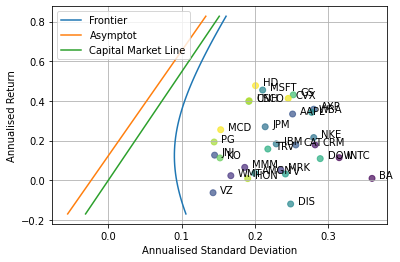

In [3]:
# 결과값 확인
print("연환산 수익률 표준 편차:")
print(STD)
print()
print("연환산 수익률 평균:")
print(Mean)
print()
print("분산-공분산 행렬:")
print(Sigma)
print()
print("상관 행렬:")
print(data_R.corr())
print()
print("최소 분산 포트폴리오:")
print("표준 편차(sd_a):", sd_a)
print("예상 수익률(m_a):", b/a)

# 그래프 그리기
fig, ax = plt.subplots()
np.random.seed(7777)  # 재현 가능성을 위한 랜덤 상태 설정
colors = np.random.rand(len(STD))  # 각 점마다 (랜덤) 색상 설정
plt.scatter(STD, Mean, c=colors, alpha=0.7)  # 자산 플롯, alpha는 투명도 매개변수

for i in range(n_Ticker): 
    ax.annotate(Ticker[i], (STD[i] + 0.01, Mean[i]))

range_inf = np.min(Mean) - 0.05
range_sup = np.max(Mean) + 0.35
z2 = np.linspace(range_inf, range_sup, 50)  # 고려되는 예상 수익률 범위

z1 = pd.DataFrame()
z = pd.DataFrame()
zr = pd.DataFrame()
i = 0
for i in range(len(z2)):
    z1[i] = [np.sqrt(((z2[i] - m_a) / m_w)**2 + sd_a**2)]  # 효율적 투자선
    z[i] = [(z2[i] - b/a)/m_w]  # 효율적 투자선에 수렴
    zr[i] = [(z2[i] - r)/m_r]  # 자본시장선
z1 = z1.iloc[0]
z = z.iloc[0]
zr = zr.iloc[0]

plt.plot(z1, z2, alpha=1, label = 'Frontier')  # 효율적 투자선 그리기
plt.plot(z, z2, alpha=1, label = 'Asymptot')  # 효율적 투자선에 수렴하는 선 그리기
plt.plot(zr, z2, alpha=1, label = 'Capital Market Line')  # 자본시장선 그리기
plt.legend(loc = 2)
plt.grid(True)
plt.xlabel('Annualised Standard Deviation')
plt.ylabel('Annualised Return')

plt.show()

**(b)**	 

Select 5 stocks(or more) from the list of 30(or any kind of stocks) construct your own optimal portfolio.  

After selecting these 5 stocks, calculate the standard deviation and expected return for your optimal portfolio.  

Additionally, provide an explanation for why you chose these specific stocks.  
(ex) Returns, Risk(Standard Deviation), Periods, Correlations…)


In [4]:
def get_combs_sharpe_rank(data):
    r = 0
    AFactor = len(data)
    n_Ticker = len(data.columns)
    Vec1 = np.linspace(1, 1, n_Ticker)

    data_R = data.pct_change()[1:]
    Mdata_R = data_R.mean()
    Mean = AFactor * Mdata_R

    Var = AFactor * data_R.var()
    STD = Var**0.5

    Sigma = AFactor * data_R.cov()
    InvSigma = inv(Sigma)

    a = Vec1.T.dot(InvSigma).dot(Vec1)
    b = Mean.T.dot(InvSigma).dot(Vec1)
    sd_a = 1 / np.sqrt(a) #
    m_a = b / a # 
    m_w = np.sqrt((Mean - b/a * Vec1).T.dot(InvSigma).dot(Mean - b/a * Vec1))
    m_r = np.sqrt((Mean - r * Vec1).T.dot(InvSigma).dot(Mean - r * Vec1))
    return m_a / sd_a

In [5]:
from itertools import combinations

stocks_sharpe = Mean / STD
top_10_sharpe_stocks = stocks_sharpe.sort_values(ascending=False).iloc[:10].index.values
top_10_sharpe_stocks
combs = list(combinations(top_10_sharpe_stocks, 5))

In [6]:
sharpe_df = pd.DataFrame(columns=['comb', 'sharpe'])
finish = len(combs)
for cnt, comb in enumerate(combs):
    temp_data = data.loc[:, comb]
    sharpe_df.loc[cnt,:] = [comb, get_combs_sharpe_rank(temp_data)]
    print(f'{cnt+1} / {finish}', end='\r')
sharpe_df

,comb,sharpe
0,"(HD, MSFT, CSCO, UNH, GS)",3.167037
1,"(HD, MSFT, CSCO, UNH, CVX)",3.172696
2,"(HD, MSFT, CSCO, UNH, MCD)",2.779352
3,"(HD, MSFT, CSCO, UNH, PG)",2.562131
4,"(HD, MSFT, CSCO, UNH, AAPL)",2.98385
...,...,...
247,"(GS, CVX, MCD, PG, AXP)",2.181236
248,"(GS, CVX, MCD, AAPL, AXP)",2.262573
249,"(GS, CVX, PG, AAPL, AXP)",2.21436
250,"(GS, MCD, PG, AAPL, AXP)",2.210118


In [8]:
top_sharpe = sharpe_df.sort_values('sharpe', ascending=False).iloc[0,:]
top_sharpe

comb      (HD, MSFT, UNH, GS, CVX)
sharpe                    3.193619
Name: 21, dtype: object

In [9]:
top_comb = top_sharpe.loc['comb']
top_data = data.loc[:, top_comb]

# 파라미터 생성
r = 0  # 무위험 이자율(without risk-free assets)
AFactor = len(top_data)  # 연환산 요소(총 관측 기간)
n_Ticker = len(top_data.columns)  # 포트폴리오 주식 수
Vec1 = np.linspace(1, 1, n_Ticker)  # 모든 구성 요소가 1로 동일한 벡터 생성

# 개별 종목 수익률 구하기
top_data_R = top_data.pct_change()[1:] # 일일 수익률
Mtop_data_R = top_data_R.mean() # 일일 수익률 평균
Mean = AFactor * Mtop_data_R  # 연환산 기준 수익률 평균

# 개별 종목 분산 구하기
Var = AFactor * top_data_R.var() # 연환산 기준 분산
STD = Var**0.5 # 연환산 기준 분산 표준편차

Sigma = AFactor * top_data_R.cov()  # 연환산 분산-공분산 행렬
InvSigma = inv(Sigma) # 분산-공분산행렬의 역행렬

# 기타 변수 계산
a = Vec1.T.dot(InvSigma).dot(Vec1)
b = Mean.T.dot(InvSigma).dot(Vec1)
sd_a = 1 / np.sqrt(a)  # 최소 분산 포트폴리오의 표준 편차
m_a = b / a  # 최소 분산 포트폴리오의 예상 수익률
m_w = np.sqrt((Mean - b/a * Vec1).T.dot(InvSigma).dot(Mean - b/a * Vec1))  # 포트폴리오 W의 예상 수익률
m_r = np.sqrt((Mean - r * Vec1).T.dot(InvSigma).dot(Mean - r * Vec1))  # 접점 포트폴리오의 예상 수익률

연환산 수익률 표준 편차:
HD      0.200896
MSFT    0.210638
UNH     0.191667
GS      0.252399
CVX     0.245514
dtype: float64

연환산 수익률 평균:
HD      0.476960
MSFT    0.454877
UNH     0.397514
GS      0.430663
CVX     0.412617
dtype: float64

분산-공분산 행렬:
            HD      MSFT       UNH        GS       CVX
HD    0.040359  0.016377  0.013890  0.011493  0.006258
MSFT  0.016377  0.044368  0.010682  0.001559  0.004110
UNH   0.013890  0.010682  0.036736  0.011057  0.011170
GS    0.011493  0.001559  0.011057  0.063705  0.035970
CVX   0.006258  0.004110  0.011170  0.035970  0.060277

상관 행렬:
            HD      MSFT       UNH        GS       CVX
HD    1.000000  0.387026  0.360722  0.226655  0.126888
MSFT  0.387026  1.000000  0.264594  0.029325  0.079474
UNH   0.360722  0.264594  1.000000  0.228551  0.237378
GS    0.226655  0.029325  0.228551  1.000000  0.580467
CVX   0.126888  0.079474  0.237378  0.580467  1.000000

최소 분산 포트폴리오:
표준 편차(sd_a): 0.13611808539900971
예상 수익률(m_a): 0.4347093634681146


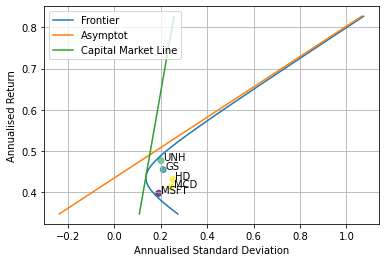

In [10]:
# 결과값 확인
print("연환산 수익률 표준 편차:")
print(STD)
print()
print("연환산 수익률 평균:")
print(Mean)
print()
print("분산-공분산 행렬:")
print(Sigma)
print()
print("상관 행렬:")
print(top_data_R.corr())
print()
print("최소 분산 포트폴리오:")
print("표준 편차(sd_a):", sd_a)
print("예상 수익률(m_a):", b/a)

# 그래프 그리기
fig, ax = plt.subplots()
np.random.seed(7777)  # 재현 가능성을 위한 랜덤 상태 설정
colors = np.random.rand(len(STD))  # 각 점마다 (랜덤) 색상 설정
plt.scatter(STD, Mean, c=colors, alpha=0.7)  # 자산 플롯, alpha는 투명도 매개변수

for i in range(n_Ticker): 
    ax.annotate(Ticker[i], (STD[i] + 0.01, Mean[i]))

range_inf = np.min(Mean) - 0.05
range_sup = np.max(Mean) + 0.35
z2 = np.linspace(range_inf, range_sup, 50)  # 고려되는 예상 수익률 범위

z1 = pd.DataFrame()
z = pd.DataFrame()
zr = pd.DataFrame()
i = 0
for i in range(len(z2)):
    z1[i] = [np.sqrt(((z2[i] - m_a) / m_w)**2 + sd_a**2)]  # 효율적 투자선
    z[i] = [(z2[i] - b/a)/m_w]  # 효율적 투자선에 수렴
    zr[i] = [(z2[i] - r)/m_r]  # 자본시장선
z1 = z1.iloc[0]
z = z.iloc[0]
zr = zr.iloc[0]

plt.plot(z1, z2, alpha=1, label = 'Frontier')  # 효율적 투자선 그리기
plt.plot(z, z2, alpha=1, label = 'Asymptot')  # 효율적 투자선에 수렴하는 선 그리기
plt.plot(zr, z2, alpha=1, label = 'Capital Market Line')  # 자본시장선 그리기
plt.legend(loc = 2)
plt.grid(True)
plt.xlabel('Annualised Standard Deviation')
plt.ylabel('Annualised Return')

plt.show()

---